In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import numpy.matlib
from sklearn.datasets import make_blobs
import altair as alt
import timeit
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#the below imported library will be used only for calculating k value
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
x, y = make_blobs(n_samples = 50000,n_features=100, shuffle=True, random_state=31)


In [3]:
columns=["X"+str(i) for i in range(0,100) ]


In [4]:
dataset=pd.DataFrame(x*10,columns=columns)

In [5]:
dataset['y']=y

In [6]:
dataset.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
0,-41.562715,93.605124,52.360690,105.400725,-55.544026,-59.157544,86.181883,-107.444812,-80.195581,12.312019,...,-82.669941,-37.530111,31.624043,-29.429608,-4.475077,48.066829,43.685096,90.030912,61.009707,0
1,-34.223290,91.138946,39.839405,91.682227,-69.163532,-64.645842,90.640408,-74.997294,-87.858597,22.432424,...,-68.765165,-23.116706,27.239912,-17.397496,4.471432,63.258737,27.032060,84.184656,54.307159,0
2,-62.498670,91.288836,35.766691,85.881244,-48.754030,-63.614656,69.216907,-71.562428,-97.495079,15.262817,...,-67.959368,-3.614227,20.238586,-24.903577,16.457763,81.521032,20.817348,86.149446,67.010572,0
3,-24.352333,96.586638,80.416931,14.746636,38.534208,-6.000026,-35.087060,-76.438184,-24.457650,-87.299064,...,-62.795246,-71.136021,-102.799698,-67.224083,40.849465,50.854086,-5.584598,22.246872,-64.379434,1
4,-8.064544,-39.286207,-42.302699,84.345354,39.333110,-24.834853,-21.777125,-22.844847,112.340285,46.294709,...,-30.561316,-57.169340,4.773741,36.081879,1.296049,54.290710,-71.729476,-63.843830,88.702724,2


In [7]:
dataset.describe()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-27.849184,52.926189,34.784503,66.074466,-4.287313,-32.136196,7.099161,-64.013370,-10.845390,-12.601297,...,-58.908976,-42.230348,-18.080730,-19.476388,21.531688,60.157594,-10.341623,17.503322,21.765477,0.999980
std,16.076320,59.609658,48.874649,41.012847,39.885150,30.940099,53.759882,31.659079,76.712231,55.683970,...,14.763814,20.481906,51.961175,51.940564,27.098819,11.929745,42.800361,51.818797,61.707523,0.816501
min,-82.063772,-71.553938,-73.308750,-28.091201,-97.391340,-116.537482,-79.401648,-128.390806,-121.059612,-126.948365,...,-111.509171,-102.209938,-126.461551,-120.536928,-41.868996,14.751824,-110.914648,-94.629749,-102.699238,0.000000
25%,-39.930332,-23.282655,-24.255940,16.661210,-51.563643,-65.845100,-33.507565,-88.398117,-78.187917,-80.989143,...,-69.803699,-60.223369,-82.741956,-70.470880,0.201600,51.843928,-57.803009,-36.963259,-56.775408,0.000000
50%,-28.344345,87.514784,53.910863,87.026595,14.515501,-20.610015,-23.186072,-78.464072,-41.258191,8.788759,...,-60.043404,-37.523679,7.677448,-27.898588,12.253317,59.868743,-3.043302,15.258334,53.817268,1.000000
75%,-15.686805,97.680909,75.208653,97.492107,26.627390,-7.699819,74.998770,-28.293458,86.947351,34.676135,...,-48.299117,-26.262869,22.325085,40.067980,49.740266,68.219472,29.751756,74.153871,69.684983,2.000000
max,24.457922,133.049238,118.785384,133.670034,68.473940,34.379586,122.611226,15.496835,132.340250,79.519375,...,-1.693529,11.945954,71.485664,93.067678,94.521188,108.982085,77.841285,120.994681,115.018975,2.000000


In [8]:
cluster0=dataset.loc[dataset['y']==0]

In [9]:
#cluster0.head()

In [10]:
#cluster0.tail()

In [11]:
cluster1=dataset.loc[dataset['y']==1]

In [12]:
cluster2=dataset.loc[dataset['y']==2]

In [13]:
cluster0.shape

(16667, 101)

In [14]:
cluster1.shape

(16667, 101)

In [15]:
cluster2.shape

(16666, 101)

In [16]:
cluster0_sample=cluster0.sample(n=5000,replace=False)

In [17]:
cluster1_sample=cluster1.sample(n=5000,replace=False)

In [18]:
cluster2_sample=cluster2.sample(n=5000,replace=False)

In [19]:
dataset2=cluster0_sample.append(cluster1_sample)

In [20]:
dataset2.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
341,-52.306078,91.575793,76.653642,85.257222,-52.517877,-74.462867,97.372361,-94.394160,-62.422375,18.480976,...,-70.737765,-12.579748,20.119683,-43.713968,22.892662,41.066833,48.716707,87.917094,52.202435,0
19738,-36.320239,80.337326,49.033799,91.118840,-55.960872,-66.880479,91.132362,-101.393581,-91.929441,4.177237,...,-80.586484,-20.563519,30.522832,-30.269642,-7.491672,58.321304,44.030865,87.472475,35.600860,0
47723,-56.427149,79.924334,50.116840,115.324115,-44.930385,-74.229482,76.618513,-67.857433,-87.859452,2.338849,...,-62.146132,-24.349624,34.182139,-34.229297,-3.032449,50.778485,33.441702,76.396105,60.569631,0
41077,-41.887916,101.735033,60.051583,81.995622,-61.526797,-72.205362,70.771138,-88.252169,-87.421460,15.047411,...,-72.406626,-13.891303,21.554944,-21.063559,-0.941045,64.929880,36.263093,92.768957,52.617462,0
4503,-41.394695,91.363530,60.249670,82.188698,-50.999822,-67.047787,64.125928,-92.719069,-73.103468,6.140221,...,-77.359195,-10.851043,38.224588,-34.252876,-1.146134,67.280904,51.911559,84.377364,64.163058,0


In [21]:
dataset3=dataset2.append(cluster2_sample)

In [22]:
dataset3.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
341,-52.306078,91.575793,76.653642,85.257222,-52.517877,-74.462867,97.372361,-94.394160,-62.422375,18.480976,...,-70.737765,-12.579748,20.119683,-43.713968,22.892662,41.066833,48.716707,87.917094,52.202435,0
19738,-36.320239,80.337326,49.033799,91.118840,-55.960872,-66.880479,91.132362,-101.393581,-91.929441,4.177237,...,-80.586484,-20.563519,30.522832,-30.269642,-7.491672,58.321304,44.030865,87.472475,35.600860,0
47723,-56.427149,79.924334,50.116840,115.324115,-44.930385,-74.229482,76.618513,-67.857433,-87.859452,2.338849,...,-62.146132,-24.349624,34.182139,-34.229297,-3.032449,50.778485,33.441702,76.396105,60.569631,0
41077,-41.887916,101.735033,60.051583,81.995622,-61.526797,-72.205362,70.771138,-88.252169,-87.421460,15.047411,...,-72.406626,-13.891303,21.554944,-21.063559,-0.941045,64.929880,36.263093,92.768957,52.617462,0
4503,-41.394695,91.363530,60.249670,82.188698,-50.999822,-67.047787,64.125928,-92.719069,-73.103468,6.140221,...,-77.359195,-10.851043,38.224588,-34.252876,-1.146134,67.280904,51.911559,84.377364,64.163058,0


In [23]:
dataset3['y'].unique()

array([0, 1, 2])

In [24]:
#plt.scatter(dataset3['X3'],dataset3["X4"])

In [25]:
dataset3.corr()['y'].sort_values(ascending=False)

y      1.000000
X52    0.986001
X38    0.974422
X17    0.961284
X29    0.952314
         ...   
X45   -0.945091
X54   -0.951124
X97   -0.964978
X23   -0.972500
X98   -0.980865
Name: y, Length: 101, dtype: float64

In [26]:
dataset3=dataset3.drop(['X45','X54','X97','X23','X28'],axis=1)

In [27]:
#dataset3=dataset3.dropna()

In [28]:
dataset3.shape

(15000, 96)

In [29]:
x=dataset3.iloc[:,:-1].values
y=dataset3.iloc[:,-1].values

In [30]:
import umap as u
import umap.plot

In [32]:
standard_embedding = u.UMAP(random_state=42).fit_transform(x)

In [33]:
standard_embedding

array([[10.362901  ,  0.4503606 ],
       [10.67623   ,  0.79451656],
       [11.820317  ,  0.95949   ],
       ...,
       [-1.878674  ,  0.15529284],
       [-2.3662312 , -0.3195992 ],
       [-2.34689   ,  0.06642922]], dtype=float32)

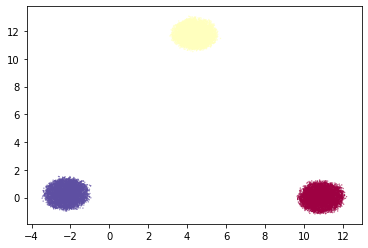

In [34]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=dataset3.y.astype(int), s=0.1, cmap='Spectral');

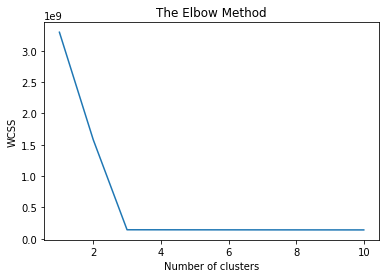

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 31)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()